In [116]:
import os
import numpy as np
import pandas as pd
import skimage
import matplotlib.pyplot as plt
from os import listdir
from skimage import io, color
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
import glob
import cv2
from PIL import Image, ImageDraw

# Finding and plotting centroid for one image - for test

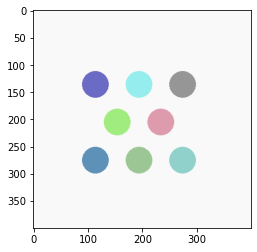

In [2]:
# reading in one image
image = io.imread('images/hw_image_8.png')
plt.imshow(image)
plt.show()


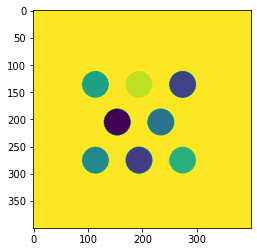

In [3]:
# image is in RGB, plotting 3rd channel
plt.imshow(image[:,:,2])
plt.show()


In [4]:
#converting the image to grey scale
img_gray = color.rgb2gray(image)

In [5]:
img_gray.dtype

dtype('float64')

In [6]:
#checking the max values
np.array(img_gray).max()

0.9764705882352942

In [7]:
#checking the min values
np.array(img_gray).min()

0.4419666666666667

In [8]:
np.unique(np.array(img_gray))

array([0.44196667, 0.53632118, 0.58823529, 0.66793255, 0.73013882,
       0.76374471, 0.83188824, 0.85607843, 0.97647059])

Making a mask with a threshold

In [9]:
mask = image > 200 # obtained by trail-error and can be modified 

In [10]:
mask.shape

(400, 400, 3)

In [12]:
#converting the mask to grey scale 
mask_gray = color.rgb2gray(mask)
mask_gray.shape

(400, 400)

In [13]:
np.unique(mask_gray)

array([0.    , 0.2125, 0.7154, 0.7875, 1.    ])

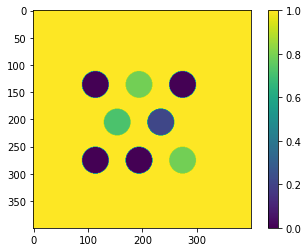

In [40]:
plt.imshow(mask_gray)
plt.colorbar()

In [15]:
# Making a binary mask where areas within the circles are 1 and the rest is 0
binary_mask = np.where(mask_gray != 1.0, 1, 0)
binary_mask.shape

(400, 400)

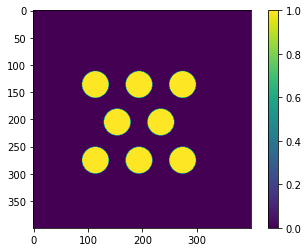

In [41]:
plt.imshow(binary_mask)
plt.colorbar()

In [23]:
#labeling the circles 
labeled_array, num_features = ndi.label((binary_mask).astype(int))

In [24]:
num_features

8

In [25]:
# getting the properties of circles
rps = regionprops(labeled_array)

In [148]:
rps

In [26]:
#obtaining/checking the areas of circles
areas = [r.area for r in rps]

In [27]:
areas

[1877, 1877, 1877, 1877, 1877, 1877, 1877, 1877]

In [31]:
#getting the centroids of circles
centroids = [region.centroid for region in rps]

In [32]:
centroids #(row, col) 

[(136.0, 114.0),
 (136.0, 194.0),
 (136.0, 274.0),
 (205.0, 154.0),
 (205.0, 234.0),
 (275.0, 114.0),
 (275.0, 194.0),
 (275.0, 274.0)]

# plotting the results

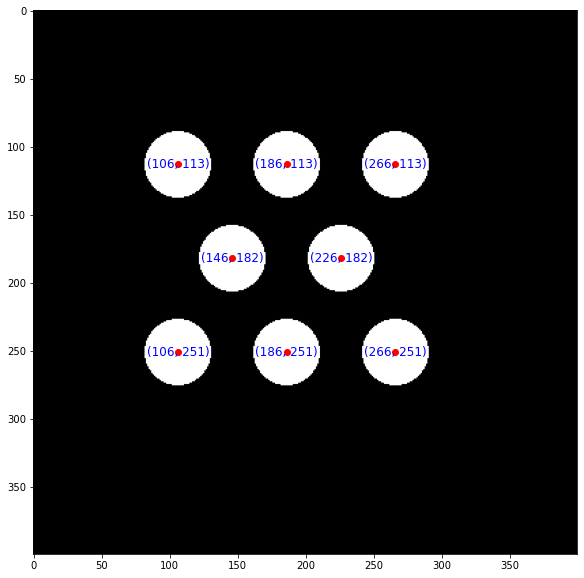

In [71]:
plt.figure(figsize=(10, 10))
plt.imshow(binary_mask, cmap='gray')
for centroid in centroids:
    plt.plot(centroid[1], centroid[0], 'ro') 
    plt.text(centroid[1], centroid[0], f'({centroid[1]:.0f}, {centroid[0]:.0f})', color='blue', fontsize=12, ha='center', va='center')
plt.savefig('images/results/test_HH.png')
plt.show()


# Plotting centroids of all images

In [106]:
# getting paths to images
png_paths = glob.glob('images/*.png')

In [62]:
png_paths

['images/hw_image_9.png',
 'images/hw_image_8.png',
 'images/hw_image_5.png',
 'images/hw_image_4.png',
 'images/hw_image_6.png',
 'images/hw_image_7.png',
 'images/hw_image_3.png',
 'images/hw_image_2.png',
 'images/hw_image_0.png',
 'images/hw_image_1.png']

In [76]:
png_paths[0].split('/')[-1].split('.')[0]

'hw_image_9'

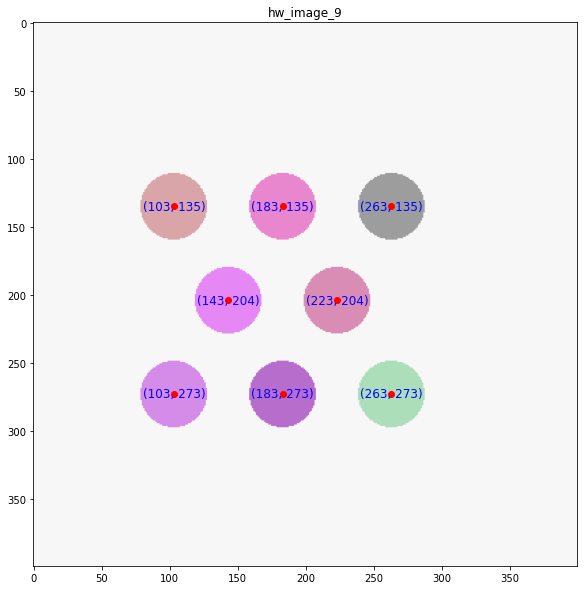

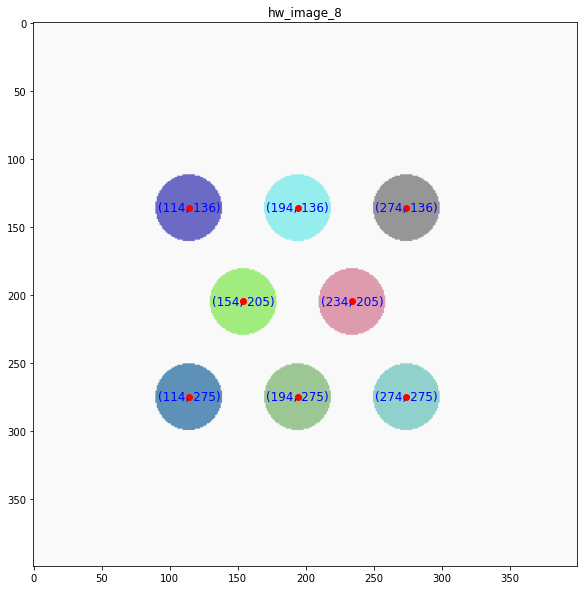

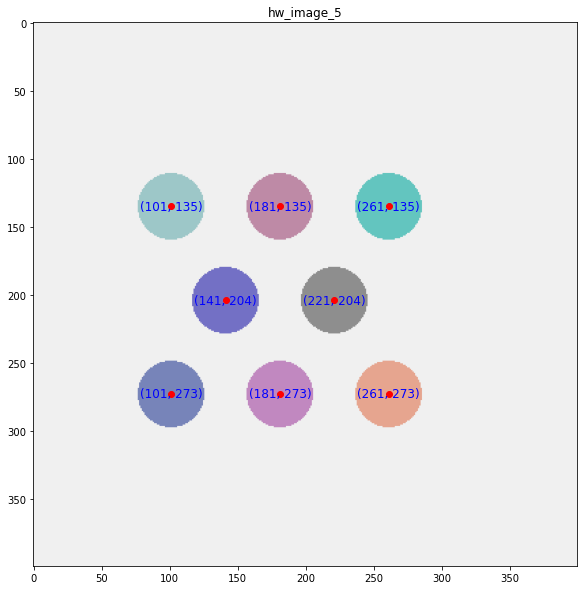

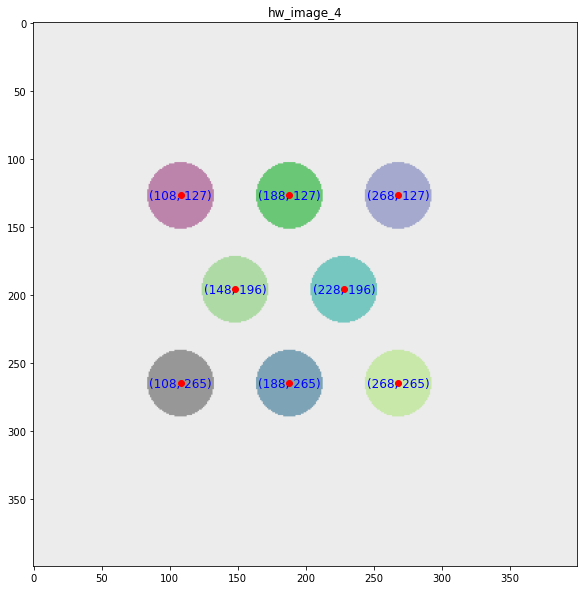

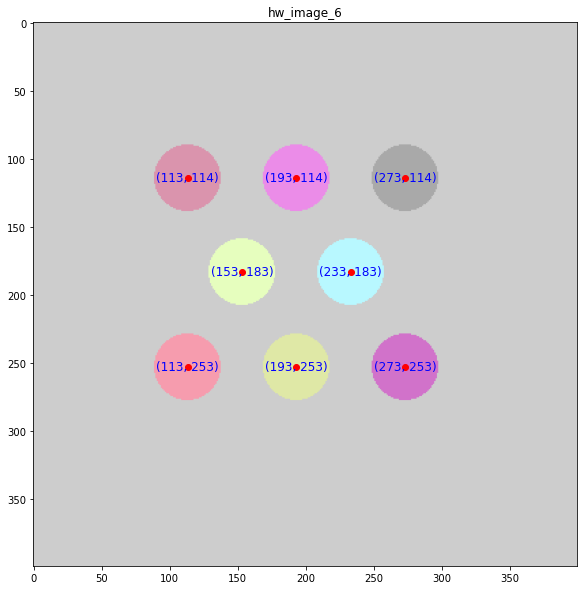

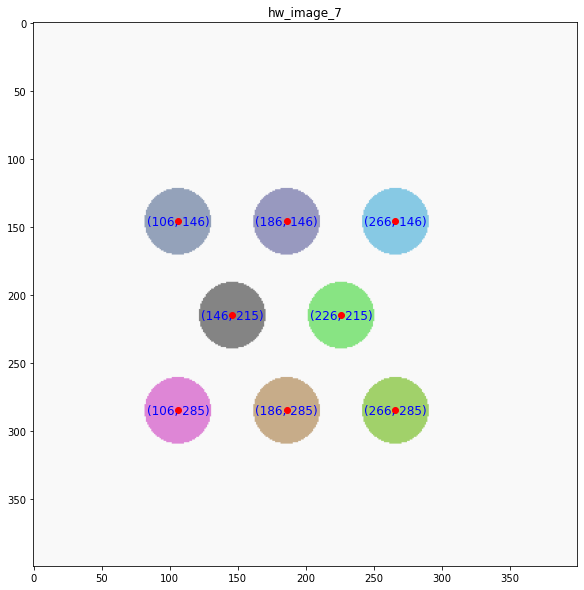

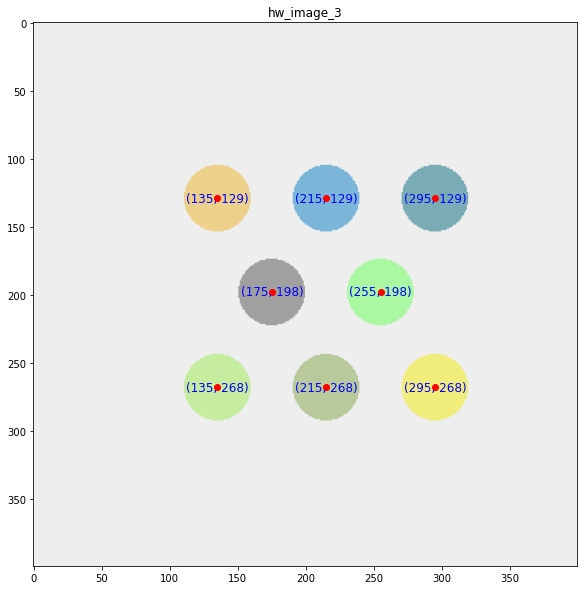

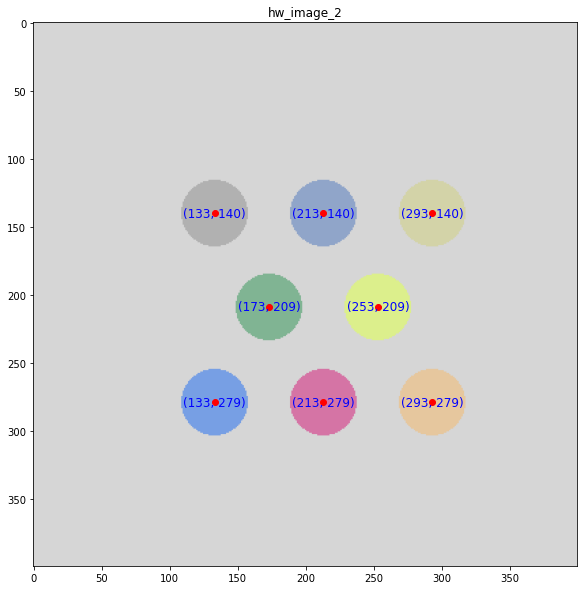

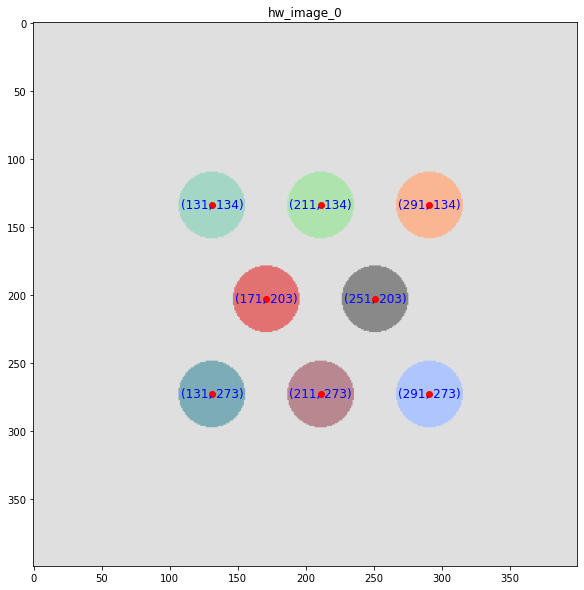

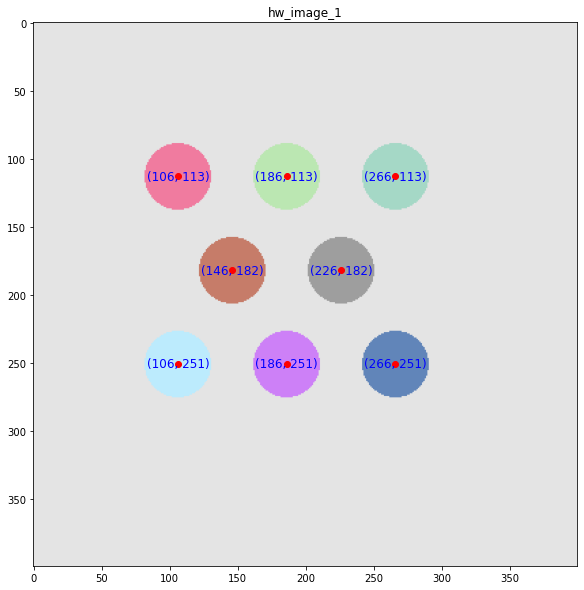

In [107]:
# looping through images, obtaining the centroids as described above and plotting the results
for png_path in png_paths:
    image = io.imread(png_path)
    name = png_path.split('/')[-1].split('.')[0]
    mask = image > 200
    mask_gray = skimage.color.rgb2gray(mask)
    binary_mask = np.where(mask_gray != 1.0, 1, 0)
    labeled_array, num_features = ndi.label((binary_mask).astype(int))
    rps = regionprops(labeled_array)
    centroids = [region.centroid for region in rps]
    plt.figure(figsize=(10, 10))
    #plt.imshow(binary_mask, cmap='gray')
    plt.imshow(image)
    for centroid in centroids:
        plt.plot(centroid[1], centroid[0], 'ro') 
        plt.text(centroid[1], centroid[0], f'({centroid[1]:.0f}, {centroid[0]:.0f})', color='blue', fontsize=12, ha='center', va='center')
    plt.title(name)
    plt.savefig(f'images/results/{name}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Testing the generalization of the approach

## Generating 5 random circles

Read image 0 shape: (400, 400, 3)


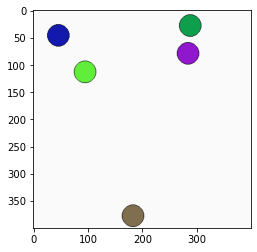

Read image 1 shape: (400, 400, 3)


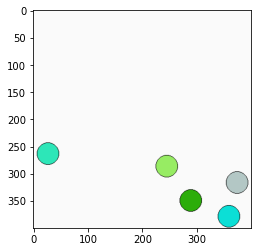

Read image 2 shape: (400, 400, 3)


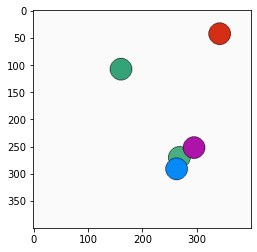

Read image 3 shape: (400, 400, 3)


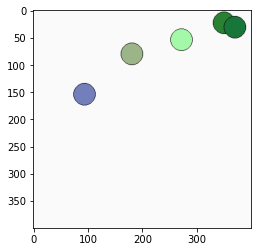

Read image 4 shape: (400, 400, 3)


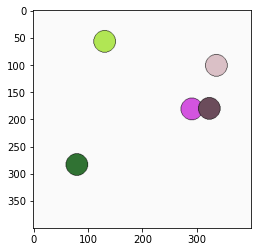

Read image 5 shape: (400, 400, 3)


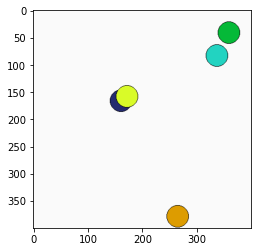

Read image 6 shape: (400, 400, 3)


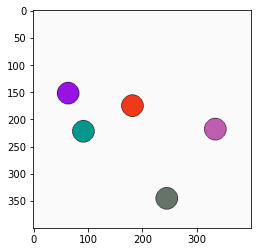

Read image 7 shape: (400, 400, 3)


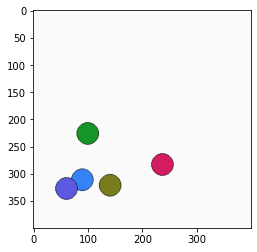

Read image 8 shape: (400, 400, 3)


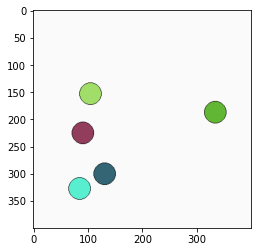

In [174]:
# Image dimensions
height, width = 400, 400
radius = 20
background_color = 250 # obtained by trial and error, darker colors may affect the ability to select all circles 

for i in range(9):
    
    image = np.ones((height, width, 3), dtype=np.uint8) * background_color # Create a background color

    colors = np.random.randint(0, 255, size=(5, 3)) # Generate random colors

    centers = np.random.randint(radius, min(height, width) - radius, size=(5, 2)) # Generate random positions for the circles

    pil_image = Image.fromarray(image) # making a pil image from array
    draw = ImageDraw.Draw(pil_image)

    for color, center in zip(colors, centers): # draw circles on the PIL image
        bbox = [
            (center[1] - radius, center[0] - radius), 
            (center[1] + radius, center[0] + radius)
        ]
        draw.ellipse(bbox, fill=tuple(color), outline='black')

    # Save the image using PIL (plt.savefig did change the dimensions of the saved images, so changed to pil save)
    pil_image.save(f'images/results/random_circles/random_circles_{i}.png')

    # read back the image to verify the dimensions
    read_image = io.imread(f'images/results/random_circles/random_circles_{i}.png')
    print(f"Read image {i} shape:", read_image.shape)

    
    plt.imshow(read_image)
    plt.show()

In [176]:
centers

array([[225,  91],
       [327,  85],
       [187, 334],
       [153, 105],
       [300, 131]])

# Generating the centroids for random circles

(400, 400, 3)


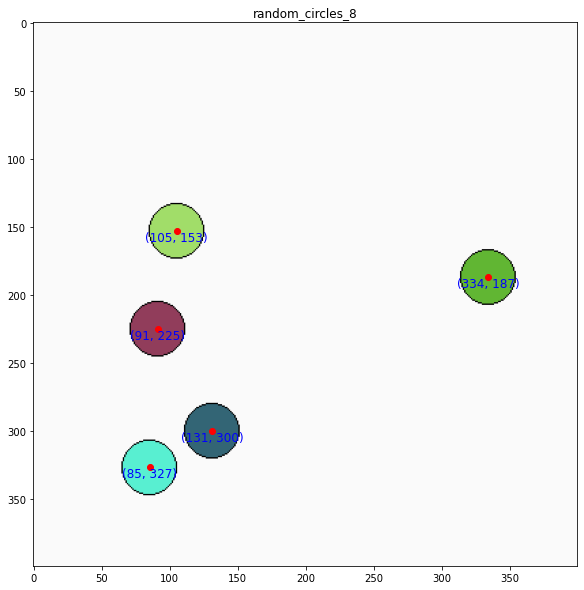

(400, 400, 3)


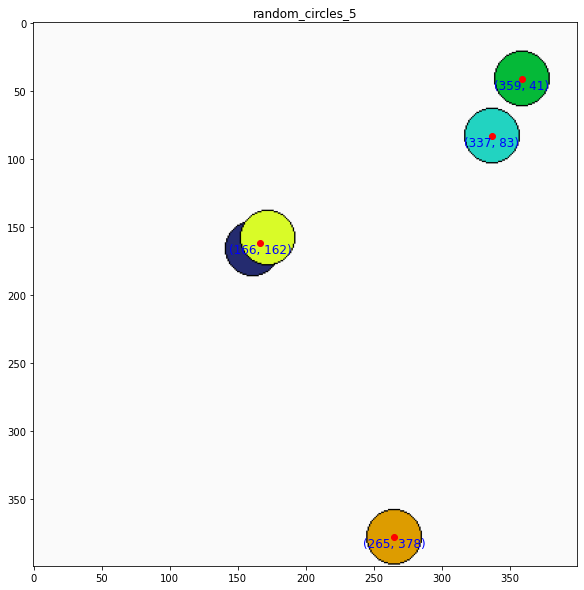

(400, 400, 3)


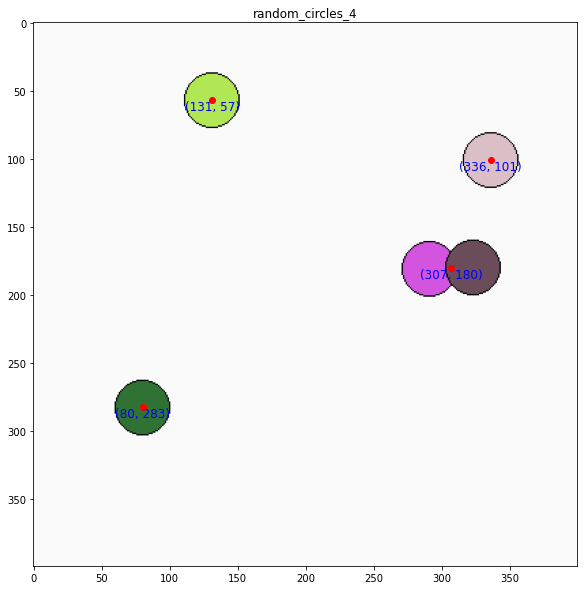

(400, 400, 3)


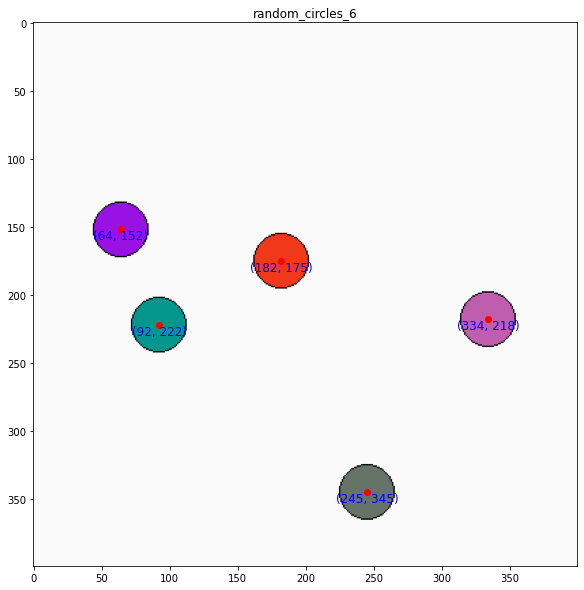

(400, 400, 3)


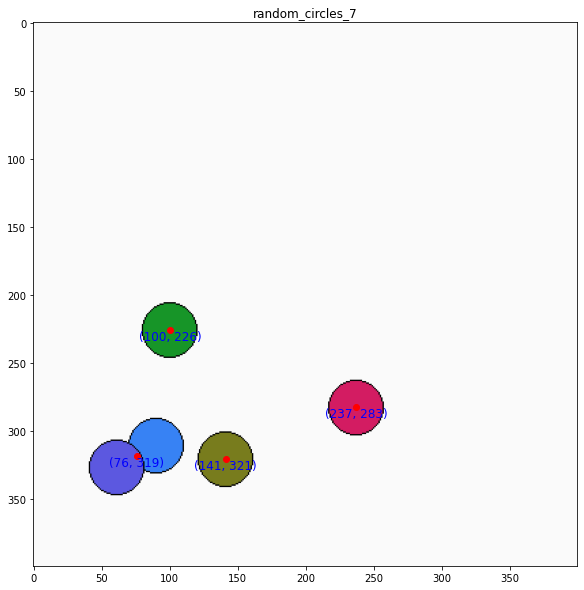

(400, 400, 3)


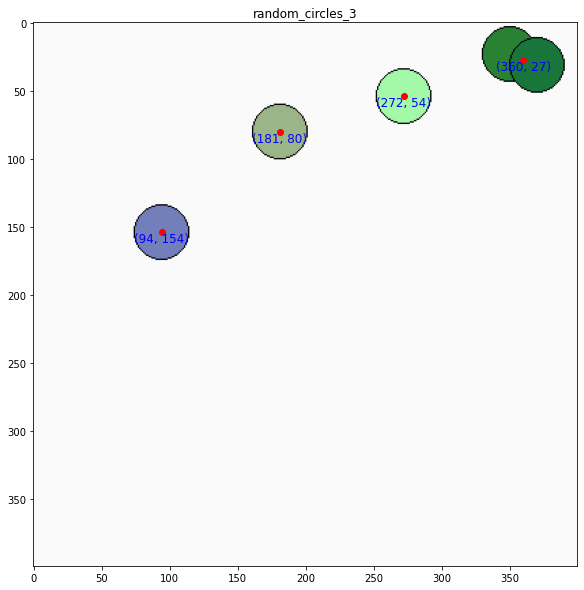

(400, 400, 3)


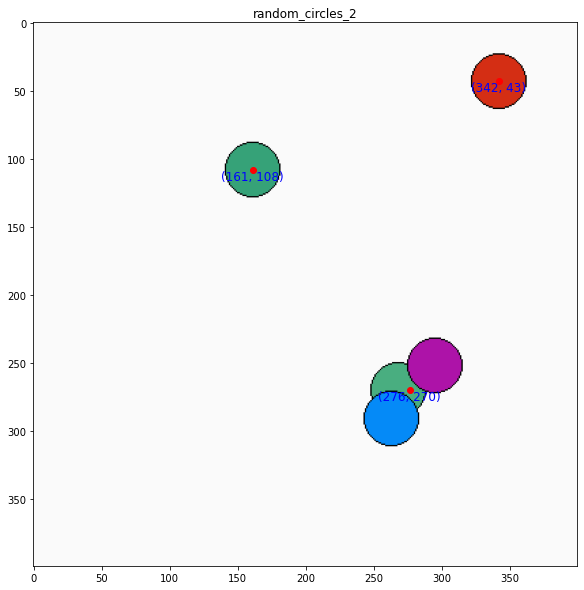

(400, 400, 3)


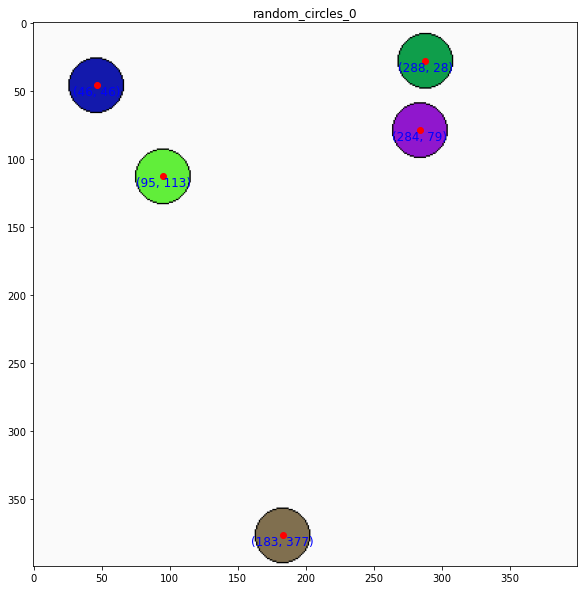

(400, 400, 3)


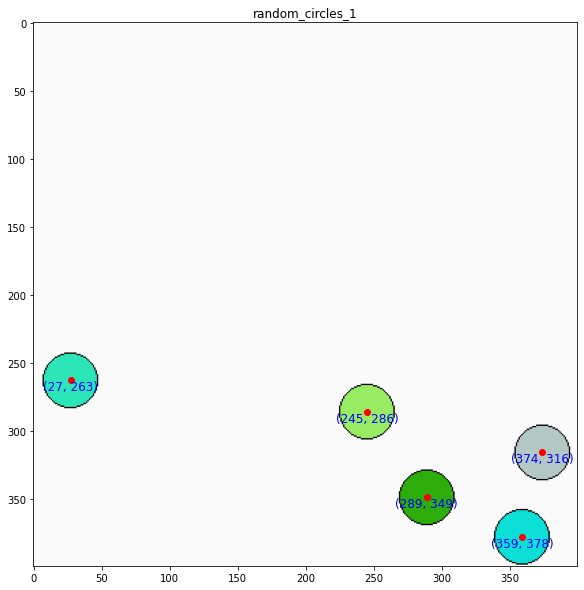

In [175]:
png_paths_rnd = glob.glob('images/results/random_circles/*.png')

for png_path in png_paths_rnd:
    image = io.imread(png_path)
    print(image.shape)
    name = png_path.split('/')[-1].split('.')[0]
    mask = image > 200
    mask_gray = skimage.color.rgb2gray(mask)
    binary_mask = np.where(mask_gray != 1.0, 1, 0)
    labeled_array, num_features = ndi.label((binary_mask).astype(int))
    rps = regionprops(labeled_array)
    centroids = [region.centroid for region in rps]
    plt.figure(figsize=(10, 10))
    #plt.imshow(np.array(mask).astype('float'), cmap='gray')
    #plt.title(f'mask_{name}')
    #plt.show()
    #plt.figure(figsize=(5, 5))
    plt.imshow(image)
    for centroid in centroids:
        plt.plot(centroid[1], centroid[0], 'ro') 
        plt.text(centroid[1], centroid[0], f'({centroid[1]:.0f}, {centroid[0]:.0f})', color='blue', fontsize=12, ha='center', va='top')
    plt.title(name)
    plt.savefig(f'images/results/random_circles/results/{name}.png', dpi=300, bbox_inches='tight')
    #pil_image.save(f'images/results/random_circles/results/{name}.png')
    plt.show()

# Caveats: 

1) When circles are close and connected, they are treated as one object!

2) grey area (background color) combined with circles' color affect the approach reproducability

3) changing the image dimensions (e.g. number of channels) is a limitation of this approach

4) finding the threshold for selecting the circles is subjective and may be tricky in differnt images


# Next Steps:

1) testing the approach on more realistic dataset as opposed to random generated images in this excersize

2) developing a more robust approach for selecting the threshold,as opposed to trail and error. For instance, if the number of circles in images is known, it can be done through a loop, and counting identified objects for different thresholds.

3) enhance the current approach by including various functions (such as image generation, centroid estimation, ...) that would help reproducibility of the work

4) developing deep learning models for image segmentations/object detection. Current approach can be used to generetae training data.

5) obtaining more properties of circles such as color, size,... if needed